In [1]:
import pandas as pd
import numpy as np

C:\Users\PINJAL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\PINJAL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
file_path='E:/Internship/spam.csv'

df=pd.read_csv(file_path,encoding='ISO-8859-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2118,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN
5439,ham,Hey i've booked the 2 lessons on sun liao...,NaN,NaN,NaN
1624,spam,500 free text msgs. Just text ok to 80488 and ...,NaN,NaN,NaN
2020,ham,Anything lor but toa payoh got place 2 walk me...,NaN,NaN,NaN
3185,ham,Happy birthday to you....dear.with lots of lov...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3'],inplace=True)

In [7]:
df.drop(columns=['Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2222,ham,Great. I was getting worried about you. Just k...
146,spam,FreeMsg Why haven't you replied to my text? I'...
212,ham,K:)k:)good:)study well.
5465,ham,Shall I bring us a bottle of wine to keep us a...
1894,spam,"FreeMsg Hey U, i just got 1 of these video/pic..."


In [9]:
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)


In [10]:
df.sample(5)

,target,text
141,ham,"Sir, Waiting for your mail."
1216,spam,You have 1 new voicemail. Please call 08719181...
1134,ham,U wake up already? Thanx 4 e tau sar piah it's...
115,ham,"As I entered my cabin my PA said, '' Happy B'd..."
4399,ham,Juz go google n search 4 qet...


In [11]:
df['target'] = df['target'].replace({'ham': 0, 'spam': 1})
print(df)


      target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]


C:\Users\PINJAL\AppData\Local\Temp\ipykernel_3160\2416961637.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# eda

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

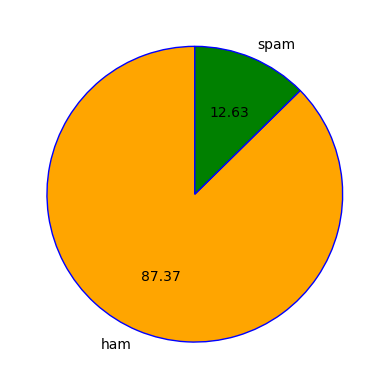

In [20]:
import matplotlib.pyplot as plt
colors = ['orange', 'green']
plt.pie(df['target'].value_counts(),labels=['ham','spam'], colors=colors,startangle=90, wedgeprops=dict(edgecolor='blue'),autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PINJAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

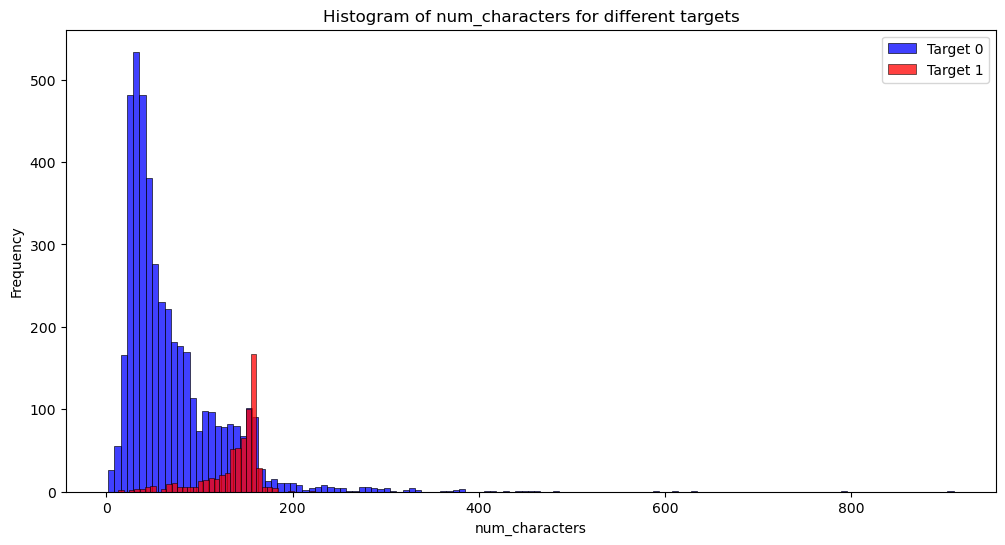

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'num_characters' column is present in your DataFrame
plt.figure(figsize=(12, 6))

# Plot histogram for target == 0 with blue color
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=False)

# Plot histogram for target == 1 with red color
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=False)

plt.legend()
plt.title('Histogram of num_characters for different targets')
plt.xlabel('num_characters')
plt.ylabel('Frequency')
plt.show()


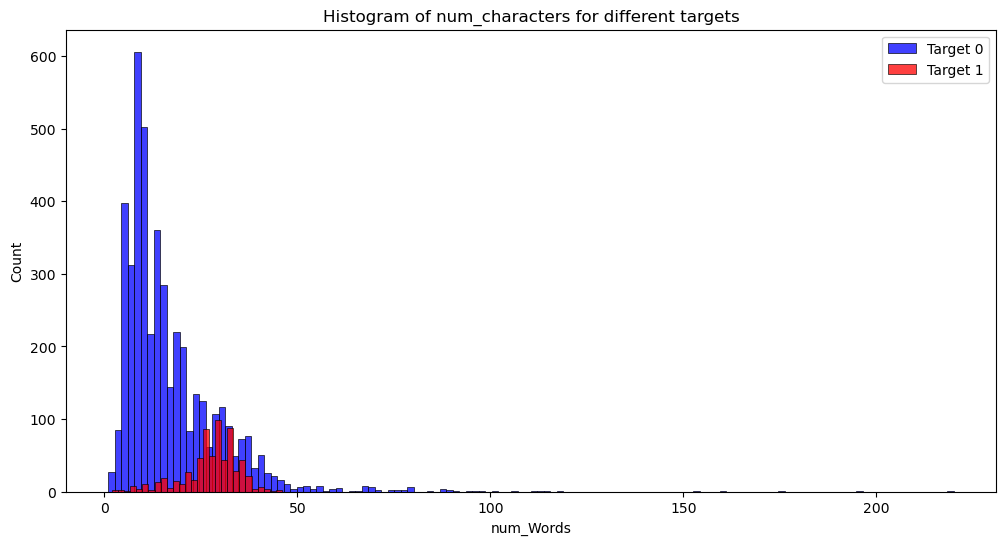

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'num_characters' column is present in your DataFrame
plt.figure(figsize=(12, 6))

# Plot histogram for target == 0 with blue color
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=False)

# Plot histogram for target == 1 with red color
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=False)

plt.legend()
plt.title('Histogram of num_characters for different targets')
plt.xlabel('num_Words')
plt.ylabel('Count')
plt.show()


C:\Users\PINJAL\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PINJAL\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PINJAL\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PINJAL\anaconda3\lib\site-packages\seaborn\_base.py:949: Futu

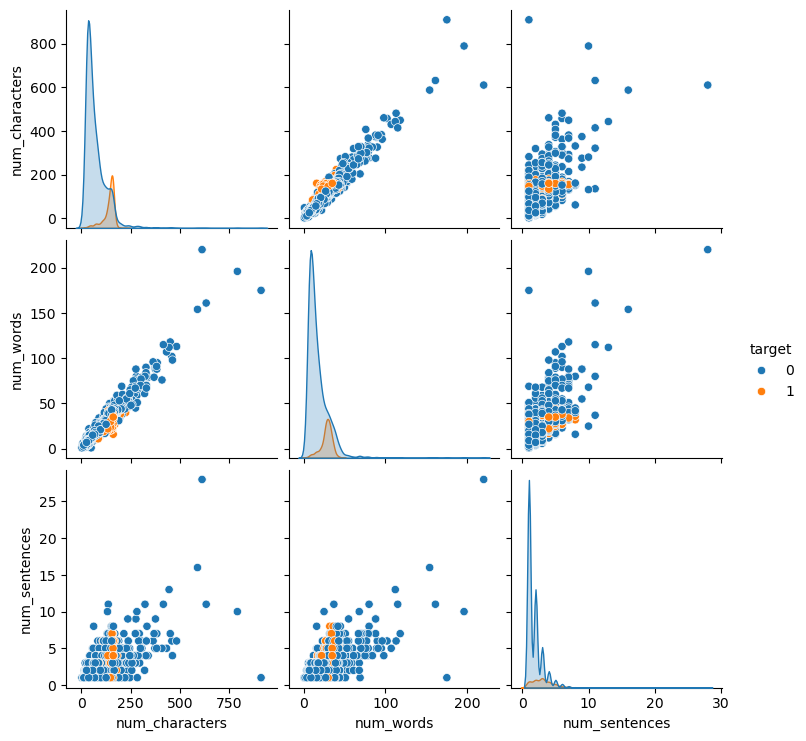

In [36]:
sns.pairplot(df,hue='target')

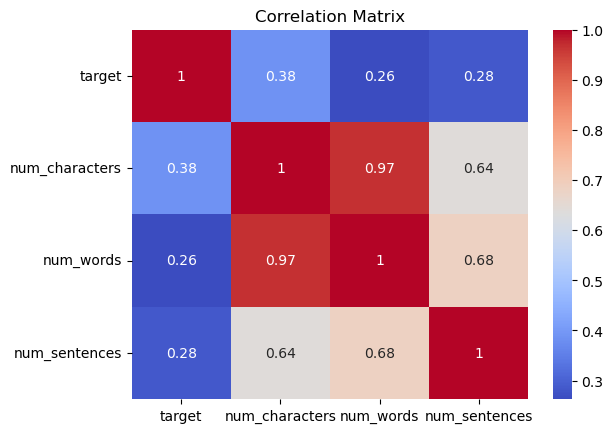

In [37]:
numeric_df = df.select_dtypes(include='number')

# Create a heatmap of the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()


# Data  Preprocessing


In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return " ".join(y)
transformed_text=transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight,k? ")
print(transformed_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PINJAL\AppData\Roaming\nltk_data...


gon na home soon want talk stuff anymor tonight k


[nltk_data]   Unzipping corpora\stopwords.zip.


In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('fighting')

'fight'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')

In [44]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

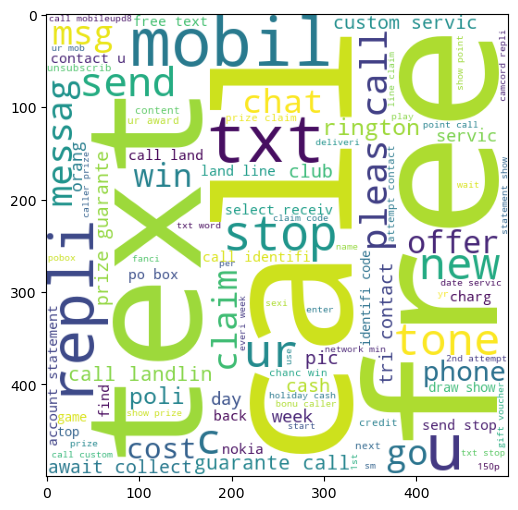

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

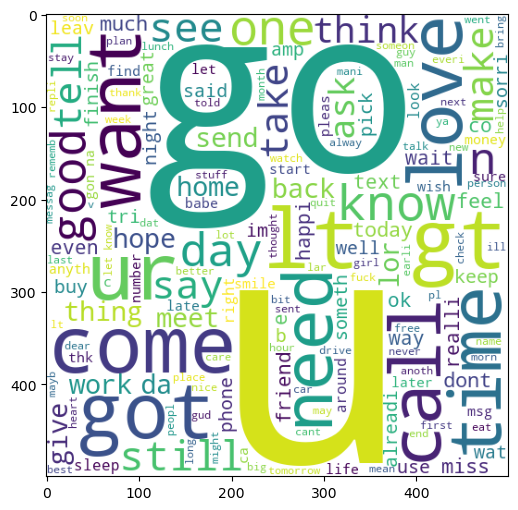

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

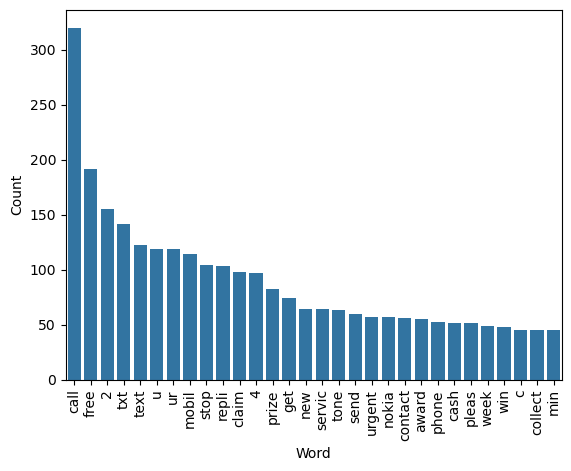

In [51]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


spam_counter = Counter(spam_corpus)

top_spam_df = pd.DataFrame(spam_counter.most_common(30), columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=top_spam_df)
plt.xticks(rotation='vertical')
plt.show()


In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35394

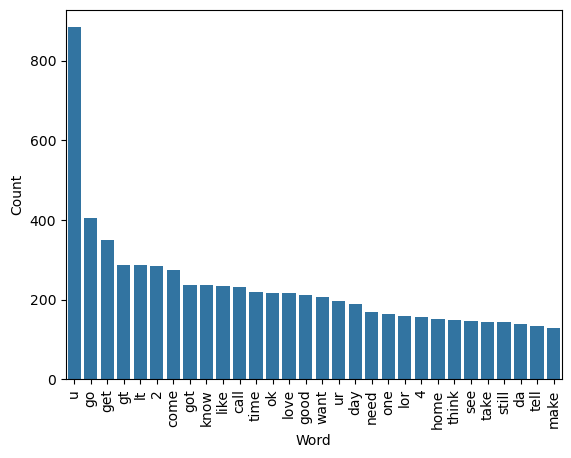

In [54]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


ham_counter = Counter(ham_corpus)

top_ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=top_ham_df)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## building the Model

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df = pd.read_csv('spam.csv', encoding='latin-1')

X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

predictions = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9838565022421525
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

